# Titanic Kaggle

## Introducción

Este reto es parte del Platzi Data Challenged, en el cual se presenta un problema que de debe resolver, además de una serie de preguntas que debes contestar con los datos aportados.

En este caso se usaran los datos de la pagina https://www.kaggle.com/c/titanic/data , Y se deben responder las siguientes preguntas:

- ¿Cuántas personas iban en el titanic? 
- ¿Cuántos hombres y mujeres sobrevivieron? 
- ¿Cuál fue el top 10 de edad que más sobrevieron y el top 10 de edad que no lo lograron? 4. ¿Cuántos cargos o títulos iban en el barco? Ejemplo: Capitanes, Mrs. Miss, etc. (Acá usarás expresiones regulares) 
- ¿Cuánto es la sumatoria del valor de los tickets en USD (yep en USD)?

## Importando Librerias y Datos

Se importan la librerías puestas en el archivo requirements.txt, en ella encontraremos:
- Numpy: Librería enfocada en operaciones numéricas y estadisticas
- Pandas: Libreria enfocada a la manipulación de datos como Dataframes


In [1]:
import pandas as pd
import numpy as np

Se importan los datos usando la libreria de pandas, estas se nombran de una forma que puedan ser facilmente identificadas.

In [2]:
df_gender = pd.read_csv('gender_submission.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Uniendo los datos en un solo DataFrame

Como parte del reto, se pide que se unan los tres dataframe en uno solo. Esto tambien es parte de la rutina de un analista de datos, ya que para realizar los analisis es recomendado que los datos se encuentren en la misma tabla, para poder cruzar los datos de mejor forma.

Para ello se usara la función **merge**, que unira al **df_test** y **df_gender** a traves de la columna **PassengerID**

In [6]:
df_1_merge = pd.merge(df_test,
                    df_gender, on = ['PassengerId'], how = 'inner')

In [7]:
df_1_merge

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


#### Reubicación de columnas

Este paso es opcional, pero para mi comidad generare una variable con la columnas del df y las reubicare para poder concatenarla con el **df_train**

In [8]:
cols = df_1_merge.columns.tolist()
col = cols[-1:] + cols[:-1]
col

['Survived',
 'PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [9]:
df_merge = df_1_merge[col]

In [10]:
df_train = df_train[col]
df_train

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Uso de la función concat

Para unir el df_train y el df_merge usamos la concatenación o la función **concat**, dado el dftrain hace referenia a una parte de los datos que se usan para **entrenar modelos de machine learning o de regresión**, por ello simplemente se unen uno bajo el otro

In [11]:
df = pd.concat([df_train, df_merge], ignore_index = True)
df

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Generando Análisis

La función "describe" no da un analisis estadístico rápido de todas las variables numéricas del dataframe

In [12]:
df.describe()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [13]:
df.columns

Index(['Survived', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Pregunta 1

In [14]:
# Cuantos pasajeros habian
df['PassengerId'].count()

1309

### Pregunta 2

In [15]:
# Cuantos sobrevivientes por género
vivos = df.loc[df.Survived== 1]
vivos.groupby(['Sex'])['Survived'].count()

Sex
female    385
male      109
Name: Survived, dtype: int64

### Pregunta 3

Se tienen dos opciones:
- Análisis redondeando la edad de los niños menores de un año a 1 año exacto.
- Análisis sin ese cambio.

In [16]:
# Tenemos dos posibilidades. Contar el top incluyendo a los niños menores de 1 año como si tuvieran 1 año o sin tomarlo
# de esa forma

df.loc[df['Age'] < 1, 'Age'] = 1
df

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,0,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,0,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
vivos_2 = df.loc[df.Survived== 1]

top_survived_r = vivos_2.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_survived_r

Age
22.0    21
24.0    20
1.0     17
18.0    16
36.0    16
30.0    16
27.0    15
35.0    14
29.0    13
45.0    12
Name: Survived, dtype: int64

In [18]:
# Top 10 de edades que más sobrevivieron
top_survived= vivos.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_survived

Age
22.0    21
24.0    20
36.0    16
30.0    16
18.0    16
27.0    15
35.0    14
29.0    13
19.0    12
45.0    12
Name: Survived, dtype: int64

In [19]:
# Top 10 edades que más murieron
no_s = df.loc[df.Survived== 0]
top_no_s = no_s.groupby(['Age'])['Survived'].count().sort_values(ascending=False).head(10)
top_no_s

Age
21.0    33
24.0    27
25.0    27
30.0    24
28.0    23
18.0    23
22.0    22
26.0    20
29.0    17
19.0    17
Name: Survived, dtype: int64

### Pregunta 4

In [20]:
#Titulos
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [21]:
df.groupby(['Title'])['PassengerId'].count().sort_values(ascending=False)

Title
Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Don               1
Dona              1
the Countess      1
Jonkheer          1
Lady              1
Sir               1
Mme               1
Capt              1
Name: PassengerId, dtype: int64

### Pregunta 5

In [22]:
#Sumatoria
df['Fare'].sum()

43550.4869

# -----------------------------------------------------------------------------

# Kaggle Competition

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [66]:
gender = pd.read_csv('gender_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
100*train.isnull().sum()/train.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [71]:
100*test.isnull().sum()/train.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
dtype: float64

In [72]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index= False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

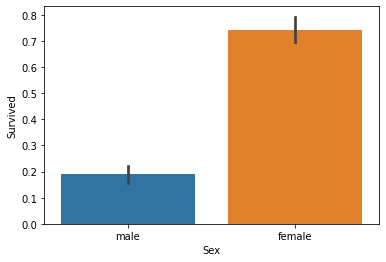

In [73]:
sns.barplot(x = "Sex", y="Survived", data=train)

In [74]:
train['Sex'] = train['Sex'] == 'male'
test['Sex'] = test['Sex'] == 'male'

In [75]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize']).sum()

,Survived
FamilySize,
1,163
2,89
3,59
4,21
5,3
6,3
7,4
8,0
11,0


In [76]:
# Generamos la columnas de FamiliSize para el test
test['FamilySize'] = train['SibSp'] + train['Parch'] + 1

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

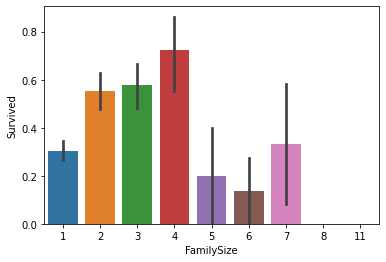

In [77]:
sns.barplot(x = "FamilySize", y = "Survived", data=train)

In [78]:
train.drop(['Ticket'], axis=1, inplace=True)
test.drop(['Ticket'], axis=1, inplace=True)

In [79]:
train[['Embarked','Survived']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


In [80]:
train['Embarked'] =train['Embarked'].fillna('S')

In [81]:
100*test.isnull().sum()/train.shape[0]

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             9.652076
SibSp           0.000000
Parch           0.000000
Fare            0.112233
Cabin          36.700337
Embarked        0.000000
FamilySize      0.000000
dtype: float64

<AxesSubplot:xlabel='Fare'>

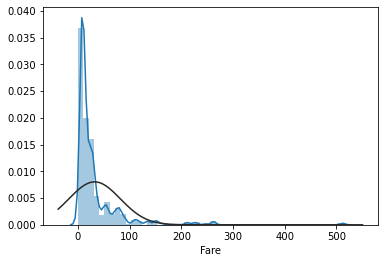

In [82]:
#Normalizar tarifa
sns.distplot(train['Fare'], fit = norm)

<AxesSubplot:xlabel='Fare'>

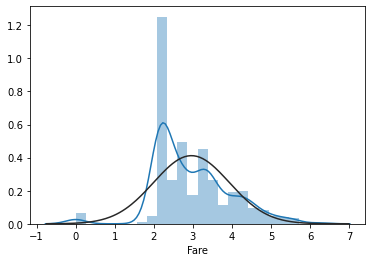

In [83]:
train['Fare'] = np.log1p(train['Fare'])
sns.distplot(train['Fare'], fit = norm)

In [84]:
train['FareGroup'] = pd.qcut(train['Fare'], 4 , labels=['A','B','C','D'])
train[['FareGroup','Survived']].groupby(['FareGroup'], as_index = False).mean()

,FareGroup,Survived
0,A,0.197309
1,B,0.303571
2,C,0.454955
3,D,0.581081


In [85]:
test['Fare'] = np.log1p(test['Fare'])
test['FareGroup'] = pd.qcut(test['Fare'], 4 , labels=['A','B','C','D'])

In [86]:
train.drop(['Fare'], axis=1, inplace=True)
test.drop(['Fare'], axis=1, inplace=True)

In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    bool    
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Cabin        204 non-null    object  
 9   Embarked     891 non-null    object  
 10  FamilySize   891 non-null    int64   
 11  FareGroup    891 non-null    category
dtypes: bool(1), category(1), float64(1), int64(6), object(3)
memory usage: 71.7+ KB


In [88]:
# We can do a cabin analysis and generate groups for the differents cabin numbers and letters
train['InCabin'] =  ~train['Cabin'].isnull()
test['InCabin'] =  ~test['Cabin'].isnull()

In [91]:
# Age
# We fill the NA values with -0.5, group by the age and bins
train["Age"] = train["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

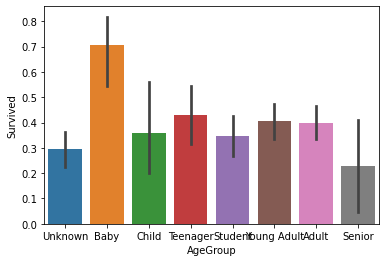

In [92]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [49]:
#Realizamos el mismo procedimieto para el DF de test
test["Age"] = test["Age"].fillna(-0.5)
test['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)

In [50]:
# Remobemos la columna de edad, de este modo no debemos llenar las celdas vacias
train.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

In [51]:
#Importamos la libreria de expresiones regulares para poder trabajar con textos
import re
#Definimos una funacion para obtener los titulos de las personas 
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

# Aplicamos las funcion a traves del metodo apply en el set de train y el test
train['Title'] = train['Name'].apply(get_title)
test['Title'] = test['Name'].apply(get_title)

# Check the results
pd.crosstab(train['Title'], train['Sex'])

Sex,False,True
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [52]:
# A la columna Title le cambiamos, a traves del metodo replace, los distintos titulos que son cercanos por significado
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

# We create a relative table
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [53]:
# Realizamos los mismo para el DataFrame test
test['Title'] = test['Title'].replace(['Lady','Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle','Miss')
test['Title'] = test['Title'].replace('Ms','Miss')
test['Title'] = test['Title'].replace('Mme','Mrs')

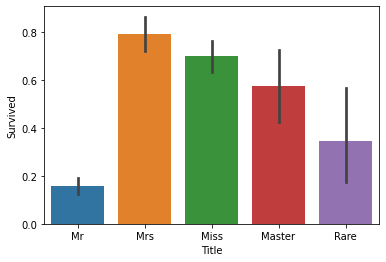

In [54]:
sns.barplot(x="Title", y="Survived", data=train)
plt.show()

In [55]:
# Ya que tengo a cada persona con su titulo, podemos eliminar el nombre, ya que no es una varible que se pueda usar para
# ayudar a entrenar a la red neuronal

train.drop(['Name'], axis=1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)

In [56]:
# Procedemos tambien a eliminar la columna de la cabina ya que faltan más del 70% de los datos
train.drop(['Cabin'], axis=1, inplace = True)
test.drop(['Cabin'], axis=1, inplace = True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,1,0,3,True,1,0,S,2,A,Student,Mr
1,2,1,1,False,1,0,C,2,D,Adult,Mrs
2,3,1,3,False,0,0,S,1,B,Young Adult,Miss
3,4,1,1,False,1,0,S,2,D,Young Adult,Mrs
4,5,0,3,True,0,0,S,1,B,Young Adult,Mr


In [58]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,892,3,True,0,0,Q,2,A,Student,Mr
1,893,3,False,1,0,S,2,A,Adult,Mrs
2,894,2,True,0,0,Q,1,B,Young Adult,Mr
3,895,3,True,0,0,S,2,B,Young Adult,Mr
4,896,3,False,1,1,S,1,B,Young Adult,Mrs


In [59]:
train.drop('PassengerId', axis=1, inplace=True)
PassengerId = test['PassengerId']
X = train
Y = test.drop('PassengerId', axis=1).copy()

In [60]:
dataset = [X, Y]

In [61]:
col_norm = ['FamilySize','SibSp','Parch']

In [62]:
# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [63]:
#Tomamos el primer set del dataframe, que es el set de train y seleccionamos 
# las columnas a normalizar almacenadas en la lista de col_norm y la
# almacemaos en feature
features = dataset[0][col_norm]

# Luego generamos un scaler, donde estandarizamos con la funcion StandardScaler
# de sklearn y aplicamos el metodo fit (las que calcula la media y la std) 
# a features values
scaler = StandardScaler().fit(features.values)

#Aplicamos esta funcion con el metodo transform a los features, de este modo
features = scaler.transform(features.values)

In [64]:
#Una ves aplicado el scaler a los valores de feature se transforman
features

array([[ 0.05915988,  0.43279337, -0.47367361],
       [ 0.05915988,  0.43279337, -0.47367361],
       [-0.56097483, -0.4745452 , -0.47367361],
       ...,
       [ 1.29942929,  0.43279337,  2.00893337],
       [-0.56097483, -0.4745452 , -0.47367361],
       [-0.56097483, -0.4745452 , -0.47367361]])

In [65]:
# Luego se asignan estos valores de no
dataset[0][col_norm] = features
dataset[0].head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,0,3,True,0.432793,-0.473674,S,0.059160,A,Student,Mr
1,1,1,False,0.432793,-0.473674,C,0.059160,D,Adult,Mrs
2,1,3,False,-0.474545,-0.473674,S,-0.560975,B,Young Adult,Miss
3,1,1,False,0.432793,-0.473674,S,0.059160,D,Young Adult,Mrs
4,0,3,True,-0.474545,-0.473674,S,-0.560975,B,Young Adult,Mr
5,0,3,True,-0.474545,-0.473674,Q,-0.560975,B,Unknown,Mr
6,0,1,True,-0.474545,-0.473674,S,-0.560975,D,Adult,Mr
7,0,3,True,2.247470,0.767630,S,1.919564,C,Baby,Master
8,1,3,False,-0.474545,2.008933,S,0.679295,B,Young Adult,Mrs
9,1,2,False,0.432793,-0.473674,C,0.059160,C,Teenager,Mrs


In [66]:
features = dataset[1][col_norm]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [67]:
dataset[1][col_norm] = features
dataset[1].head(10)

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,FareGroup,AgeGroup,Title
0,3,True,-0.499470,-0.400248,Q,0.016932,A,Student,Mr
1,3,False,0.616992,-0.400248,S,0.016932,A,Adult,Mrs
2,2,True,-0.499470,-0.400248,Q,-0.572859,B,Young Adult,Mr
3,3,True,-0.499470,-0.400248,S,0.016932,B,Young Adult,Mr
4,3,False,0.616992,0.619896,S,-0.572859,B,Young Adult,Mrs
5,3,True,-0.499470,-0.400248,S,-0.572859,B,Unknown,Mr
6,3,False,-0.499470,-0.400248,Q,-0.572859,A,Adult,Miss
7,2,True,0.616992,0.619896,S,1.786305,C,Baby,Mr
8,3,False,-0.499470,-0.400248,C,0.606723,A,Young Adult,Mrs
9,3,True,1.733455,-0.400248,S,0.016932,C,Teenager,Mr


In [68]:
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title']
titanic_cat = dataset[0][cols]
titanic_cat = pd.concat([pd.get_dummies(titanic_cat[col], prefix = col) for col in titanic_cat], axis=1)
titanic_cat.head()
dataset[0] = pd.concat([dataset[0][dataset[0].columns[~dataset[0].columns.isin(cols)]], titanic_cat], axis=1)
dataset[0].head()

,Survived,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,True,0.432793,-0.473674,0.059160,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,False,0.432793,-0.473674,0.059160,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,True,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [69]:
titanic_cat = dataset[1][cols]
titanic_cat = pd.concat([pd.get_dummies(titanic_cat[col], prefix = col) for col in titanic_cat], axis=1)
titanic_cat.head()
dataset[1] = pd.concat([dataset[1][dataset[1].columns[~dataset[1].columns.isin(cols)]], titanic_cat], axis=1)
dataset[1].head()

,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,True,-0.499470,-0.400248,0.016932,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,False,0.616992,-0.400248,0.016932,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,True,-0.499470,-0.400248,-0.572859,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,True,-0.499470,-0.400248,0.016932,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,False,0.616992,0.619896,-0.572859,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [70]:
dataset[0].columns.tolist()

['Survived',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Unknown',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Teenager',
 'AgeGroup_Student',
 'AgeGroup_Young Adult',
 'AgeGroup_Adult',
 'AgeGroup_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

In [71]:
dataset[0]

,Survived,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,True,0.432793,-0.473674,0.059160,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,False,0.432793,-0.473674,0.059160,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,True,-0.474545,-0.473674,-0.560975,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,True,-0.474545,-0.473674,-0.560975,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
887,1,False,-0.474545,-0.473674,-0.560975,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
888,0,False,0.432793,2.008933,1.299429,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
889,1,True,-0.474545,-0.473674,-0.560975,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [77]:
dataset[0].dtypes

Survived                  int64
Sex                        bool
SibSp                   float64
Parch                   float64
FamilySize              float64
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
FareGroup_A               uint8
FareGroup_B               uint8
FareGroup_C               uint8
FareGroup_D               uint8
AgeGroup_Unknown          uint8
AgeGroup_Baby             uint8
AgeGroup_Child            uint8
AgeGroup_Teenager         uint8
AgeGroup_Student          uint8
AgeGroup_Young Adult      uint8
AgeGroup_Adult            uint8
AgeGroup_Senior           uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Rare                uint8
dtype: object

In [73]:
dataset[0].shape[1]

28

In [78]:
# Generamos dos variables a partir del dataset 0 o de train. Al primero le damos las variables independientes
# y_feat contendra la variable a predecir, la dependiente, con estos dos podemos entrenar el modelo
x_feat = dataset[0].drop('Survived', axis=1).copy()
y_feat = dataset[0]['Survived']

In [79]:
x_feat

,Sex,SibSp,Parch,FamilySize,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,...,AgeGroup_Teenager,AgeGroup_Student,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,True,0.432793,-0.473674,0.059160,0,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,False,0.432793,-0.473674,0.059160,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,False,-0.474545,-0.473674,-0.560975,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,False,0.432793,-0.473674,0.059160,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,True,-0.474545,-0.473674,-0.560975,0,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,-0.474545,-0.473674,-0.560975,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
887,False,-0.474545,-0.473674,-0.560975,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
888,False,0.432793,2.008933,1.299429,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
889,True,-0.474545,-0.473674,-0.560975,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [84]:
features = x_feat.columns.tolist()

In [81]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

# Para generar el entrenamiento usaremos la funcion de RFE de Sklearn, la cual es un ranking de funciones iteradoras
# Estas asignan de manera externa los pesos a las funciones y de manera recursiva, va eliminando a las que tiene peor desempeño
# rFE = Recursive Feature Elimination

#RFE(estimator, *, n_features_to_select=None, step=1, verbose=0)
# Asignamos el numero de funciones a seleccionar
n = 15

# Creamos el modelo a traves de la Regresión logistica y calculamos el RMSE
lr = LogisticRegression(n_jobs=4, verbose=2)
rfe = RFE(lr, n, verbose=2)
rfe = rfe.fit(x_feat, y_feat.values.ravel())
# El metodo ravel permite leer un array de numpy de nxm como si fuera de nx1, como hacer un reshape(-1,1)

C:\Users\angel\anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 27 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 26 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 25 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 24 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    1.4s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 23 features.
Fitting estimator with 22 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 21 features.
Fitting estimator with 20 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished


Fitting estimator with 19 features.


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 18 features.
Fitting estimator with 17 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


Fitting estimator with 16 features.


In [82]:
# Printear Support and Ranking
# Support nos muestra la mascara de las funciones o caracteristicas seleccionadas
print(rfe.support_)

# Es el ranking de los features(func o caract), donde a los mejores se les asigna el valor 1
print(rfe.ranking_)

[ True False False  True  True False  True False False  True  True  True
 False  True False  True False False False  True False  True  True False
  True  True  True]
[ 1  3 10  1  1 13  1  8  7  1  1  1  9  1  4  1  5 11 12  1  2  1  1  6
  1  1  1]


In [85]:
# La función zip itera los elementos de las listas asignadas y devuelve una lista de listas, uniendo el element del indice 1
# de la primera lista con el elemento eb el inice 1 de la lista 2
z = zip(features, rfe.support_, rfe.ranking_)
list(z)

[('Sex', True, 1),
 ('SibSp', False, 3),
 ('Parch', False, 10),
 ('FamilySize', True, 1),
 ('Pclass_1', True, 1),
 ('Pclass_2', False, 13),
 ('Pclass_3', True, 1),
 ('Embarked_C', False, 8),
 ('Embarked_Q', False, 7),
 ('Embarked_S', True, 1),
 ('FareGroup_A', True, 1),
 ('FareGroup_B', True, 1),
 ('FareGroup_C', False, 9),
 ('FareGroup_D', True, 1),
 ('AgeGroup_Unknown', False, 4),
 ('AgeGroup_Baby', True, 1),
 ('AgeGroup_Child', False, 5),
 ('AgeGroup_Teenager', False, 11),
 ('AgeGroup_Student', False, 12),
 ('AgeGroup_Young Adult', True, 1),
 ('AgeGroup_Adult', False, 2),
 ('AgeGroup_Senior', True, 1),
 ('Title_Master', True, 1),
 ('Title_Miss', False, 6),
 ('Title_Mr', True, 1),
 ('Title_Mrs', True, 1),
 ('Title_Rare', True, 1)]

In [86]:
columnas_rank10 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >= 1 and  r<=10:
        columnas_rank10.append(v)

In [87]:
columnas_rank10

['Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'Pclass_1',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Unknown',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Young Adult',
 'AgeGroup_Adult',
 'AgeGroup_Senior',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare']

In [89]:
from sklearn.model_selection import train_test_split

# generar dos nuevas variables para ahora si realizar el entrenmiento
x_ = dataset[0][columnas_rank10]
y_ = dataset[0]['Survived']

# Crar el set de train y test 80-20, a traves del train:test_split, con un random_state=41, esto quiere decir que siempre
# Tomara los mismos datos al separar, no lo hara de manera random
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.2, random_state=42)

In [90]:
# Modelo 1: Arboles de decisión
model1 = DecisionTreeClassifier().fit(x_train,y_train)
model1

DecisionTreeClassifier()

In [91]:
#Score modelo 1
dectree_score1 = round(model1.score(x_train, y_train) * 100, 2)
print(dectree_score1)

90.59


In [98]:
predict_dt1 = model1.predict(x_test)
predict_dt1

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [101]:
# Matriz de confusión
from sklearn.metrics import classification_report

print(classification_report(y_test,predict_dt1))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       105
           1       0.78      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



<module 'matplotlib.pyplot' from 'C:\\Users\\angel\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

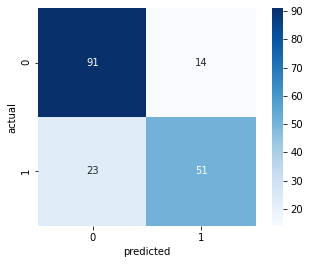

In [103]:
# Plotear matriz de confusion
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, predict_dt1)
sns.heatmap(matrix, annot = True, fmt ='d', cmap ='Blues', square = True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

## Validacion

In [104]:
# Testing con arbol de decisión
x_val = dataset[1][columnas_rank10]
predicted_dt = model1.predict(x_val)
predicted_dt

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [105]:
len(predicted_dt)

418

In [107]:
submission = pd.DataFrame({
    'PassengerID': PassengerId,
    'Survived': predicted_dt
    })
submission.to_csv('submission_DT.csv', index = False)

In [108]:
pd.read_csv('submission_DT.csv')

,PassengerID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [109]:
!pip install --upgrade kaggle

  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=73810 sha256=bb2870f89e9c8a9e443f77ab3b57fa6e647cff922204ffc86d9bf5155a03d2ed
  Stored in directory: c:\users\angel\appdata\local\pip\cache\wheels\79\40\57\49eee0c279b56aa3e06d10708dcfb53142240861b122303f2b
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=7020 sha256=956bdd5b27e461102b7caf82ad4c073d54f006122fe0a34e124c314a9be90610
  Stored in directory: c:\users\angel\appdata\local\pip\cache\wheels\91\4d\4f\e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
Successfully built kaggle python-slugify
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.9
    Uninstalling urllib3-1.25.9:
      Successfully uninstalled urllib3-1.25.9


In [111]:
!chmod 600 ~/.kaggle/kaggle.json

"chmod" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
